In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import string
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
import requests
import folium
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from tqdm import tqdm, notebook

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

sns.set()

In [5]:
df_myvaccine = pd.read_csv("after-sentiment/myvaccine.csv")
df_myvaccine.columns

Index(['created_at', 'id', 'source', 'text', 'user_location', 'text_clean',
       'text_lemma', 'text_lemma1', 'cluster'],
      dtype='object')

In [6]:
df_myvaccine.dropna(inplace=True)
df_myvaccine.head()

,created_at,id,source,text,user_location,text_clean,text_lemma,text_lemma1,cluster
580,Sun Apr 19 03:08:09 +0000 2020,1.251709e+18,"<a href=""http://twitter.com/download/iphone"" r...","RT @leapsmag: Today, Jennifer Haller, a health...","KayHell, Marehshia",today jennifer haller healthy mother two perso...,"['today', 'jennifer', 'haller', 'healthy', 'mo...",today jennifer haller healthy mother two perso...,1.0
672,Sat Apr 18 11:44:46 +0000 2020,1.251477e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @atrupar: INGRAHAM: We don't have a vaccine...,"Virginia, USA",ingraham vaccine sars hiv life went right fauc...,"['ingraham', 'vaccine', 'sars', 'hiv', 'life',...",ingraham vaccine sars hiv life right fauci hiv...,1.0
873,Tue Apr 28 03:12:46 +0000 2020,1.254972e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @RealCandaceO: This is your daily reminder ...,"Crofton, MD",daily reminder circumstances getting vaccine a...,"['daily', 'reminder', 'circumstance', 'get', '...",daily reminder circumstance get vaccine available,1.0
929,Mon Apr 20 04:17:57 +0000 2020,1.252089e+18,"<a href=""http://twitter.com/download/iphone"" r...","RT @techsupremo: Until a vaccine is found, hum...","Tangkak, Johor",vaccine found humanity adapt new normal,"['vaccine', 'find', 'humanity', 'adapt', 'new'...",vaccine find humanity adapt new normal,1.0
943,Sun Apr 19 00:13:28 +0000 2020,1.251665e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @PeterKolchinsky: I’m a virologist &amp; in...,"Pays de Galles, Royaume-Uni",virologist amp investor amp hearing people imp...,"['virologist', 'amp', 'investor', 'amp', 'hear...",virologist amp investor amp hear people imposs...,1.0


In [89]:
df_total['text_clean'].head()

0    today jennifer haller healthy mother two perso...
1    ingraham vaccine sars hiv life went right fauc...
2    daily reminder circumstances getting vaccine a...
3              vaccine found humanity adapt new normal
4    virologist amp investor amp hearing people imp...
Name: text_clean, dtype: object

In [7]:
df_total=pd.read_csv("after-sentiment/Total_tweets.csv")
df_total.columns

Index(['created_at', 'id', 'source', 'text', 'user_location', 'text_clean',
       'text_lemma', 'text_lemma1', 'cluster', 'polarity', 'subjectivity',
       'sentiment', 'neg', 'pos', 'neu', 'text_len', 'text_word_count'],
      dtype='object')

In [9]:
df_total.dropna(inplace=True)
df_total.head()

,created_at,id,source,text,user_location,text_clean,text_lemma,text_lemma1,cluster,polarity,subjectivity,sentiment,neg,pos,neu,text_len,text_word_count
0,Sun Apr 19 03:08:09 +0000 2020,1.251709e+18,"<a href=""http://twitter.com/download/iphone"" r...","RT @leapsmag: Today, Jennifer Haller, a health...","KayHell, Marehshia",today jennifer haller healthy mother two perso...,"['today', 'jennifer', 'haller', 'healthy', 'mo...",today jennifer haller healthy mother two perso...,1.0,0.250000,0.750000,positive,0.0,0.197,0.803,84,12
1,Sat Apr 18 11:44:46 +0000 2020,1.251477e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @atrupar: INGRAHAM: We don't have a vaccine...,"Virginia, USA",ingraham vaccine sars hiv life went right fauc...,"['ingraham', 'vaccine', 'sars', 'hiv', 'life',...",ingraham vaccine sars hiv life right fauci hiv...,1.0,0.295238,0.645238,positive,0.0,0.220,0.780,76,12
2,Tue Apr 28 03:12:46 +0000 2020,1.254972e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @RealCandaceO: This is your daily reminder ...,"Crofton, MD",daily reminder circumstances getting vaccine a...,"['daily', 'reminder', 'circumstance', 'get', '...",daily reminder circumstance get vaccine available,1.0,0.200000,0.200000,neuteral,0.0,0.000,1.000,54,6
3,Mon Apr 20 04:17:57 +0000 2020,1.252089e+18,"<a href=""http://twitter.com/download/iphone"" r...","RT @techsupremo: Until a vaccine is found, hum...","Tangkak, Johor",vaccine found humanity adapt new normal,"['vaccine', 'find', 'humanity', 'adapt', 'new'...",vaccine find humanity adapt new normal,1.0,0.143182,0.552273,neuteral,0.0,0.000,1.000,39,6
4,Sun Apr 19 00:13:28 +0000 2020,1.251665e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @PeterKolchinsky: I’m a virologist &amp; in...,"Pays de Galles, Royaume-Uni",virologist amp investor amp hearing people imp...,"['virologist', 'amp', 'investor', 'amp', 'hear...",virologist amp investor amp hear people imposs...,1.0,-0.083333,0.812500,neuteral,0.0,0.000,1.000,79,11


<p>We can see that polarity is 0.25, which means that the statement is positive and 0.75 subjectivity refers that mostly it is a public opinion and not a factual information. <b>The higher subjectivity means that the text contains personal opinion rather than factual information. </b></p>

In [11]:
def calcualte_percentage(part, total):
    score= (part*100)/total
    return score

In [24]:
# calcuate percentage of subjectivity more to less
count_sub=0
count_obj=0
count_neither=0
for tweet_subjectivity in df_total['subjectivity']:
    if tweet_subjectivity > 0.5:
        count_sub += 1
    elif tweet_subjectivity == 0.5:
        count_neither += 1
    elif tweet_subjectivity < 0.5:
        count_obj += 1
sub_precent= calcualte_percentage(count_sub, len(df_total))
obj_percent= calcualte_percentage(count_obj, len(df_total))
neither_percent= calcualte_percentage(count_neither, len(df_total))

print("subjectivity: ", format(sub_precent, '.2f'), " %")
print("Objectivity: ", format(obj_percent,'.2f'), " %")
print("In between: ", format(neither_percent,'.2f'), " %")

subjectivity:  31.56  %
Objectivity:  63.24  %
In between:  5.21  %


<h3>Working with Date</h3>

In [34]:
#convert to datetime
df_total['created_at']= pd.to_datetime(df_total['created_at'])
df_total['created_at'].head()

0   2020-04-19 03:08:09
1   2020-04-18 11:44:46
2   2020-04-28 03:12:46
3   2020-04-20 04:17:57
4   2020-04-19 00:13:28
Name: created_at, dtype: datetime64[ns]

In [40]:
df_total['date'] = df_total['created_at'].dt.date
df_total['date'].head()

0    2020-04-19
1    2020-04-18
2    2020-04-28
3    2020-04-20
4    2020-04-19
Name: date, dtype: object

In [43]:
df_total['month']= df_total['created_at'].dt.month
df_total['month'].head()

0    4
1    4
2    4
3    4
4    4
Name: month, dtype: int64

In [44]:
df_total['year']= df_total['created_at'].dt.year
df_total['year'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: year, dtype: int64

<h2>Subjectivity</h2>

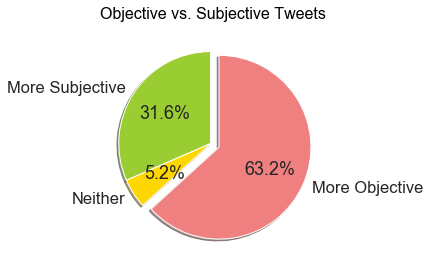

In [68]:
# Plot pie
labels = 'More Subjective', 'Neither', 'More Objective'
sizes = [sub_precent, neither_percent, obj_percent]

plt.pie(sizes, labels=labels, explode= (0,0,0.1),
        colors=['yellowgreen', 'gold', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Objective vs. Subjective Tweets \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.savefig("plots//Objective vs. Subjective Tweets.png")
plt.show()


<h2>Sentiment</h2>

In [ ]:
# pie


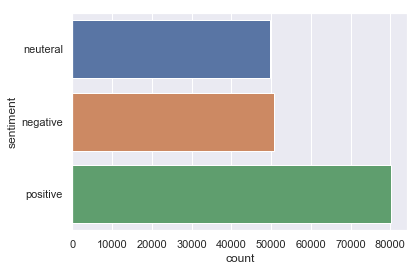

In [83]:
# sentiment count counts
order = df_total.sentiment.value_counts(ascending=True).index
#plt.figure(figsize=(10,6))
sns.countplot(y='sentiment', data=df_total, order= order)
plt.savefig('plots//sentiment count.png')

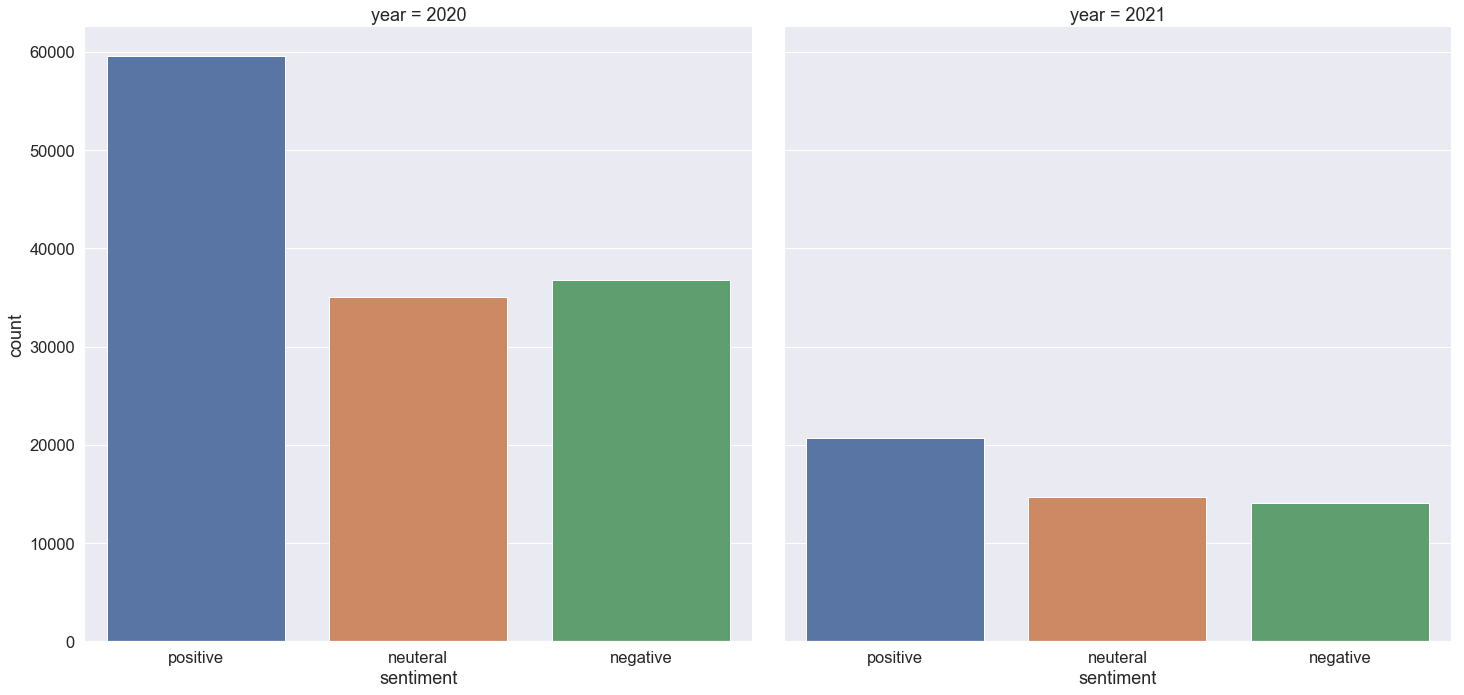

In [72]:
#subgraphs for sentiment for each year
sns.set(font_scale=1.5)
sns.catplot(data=df_total, x='sentiment', col="year", col_wrap=3, sharex=False, height=10, kind='count')
plt.savefig('plots//sentiment by year.png')

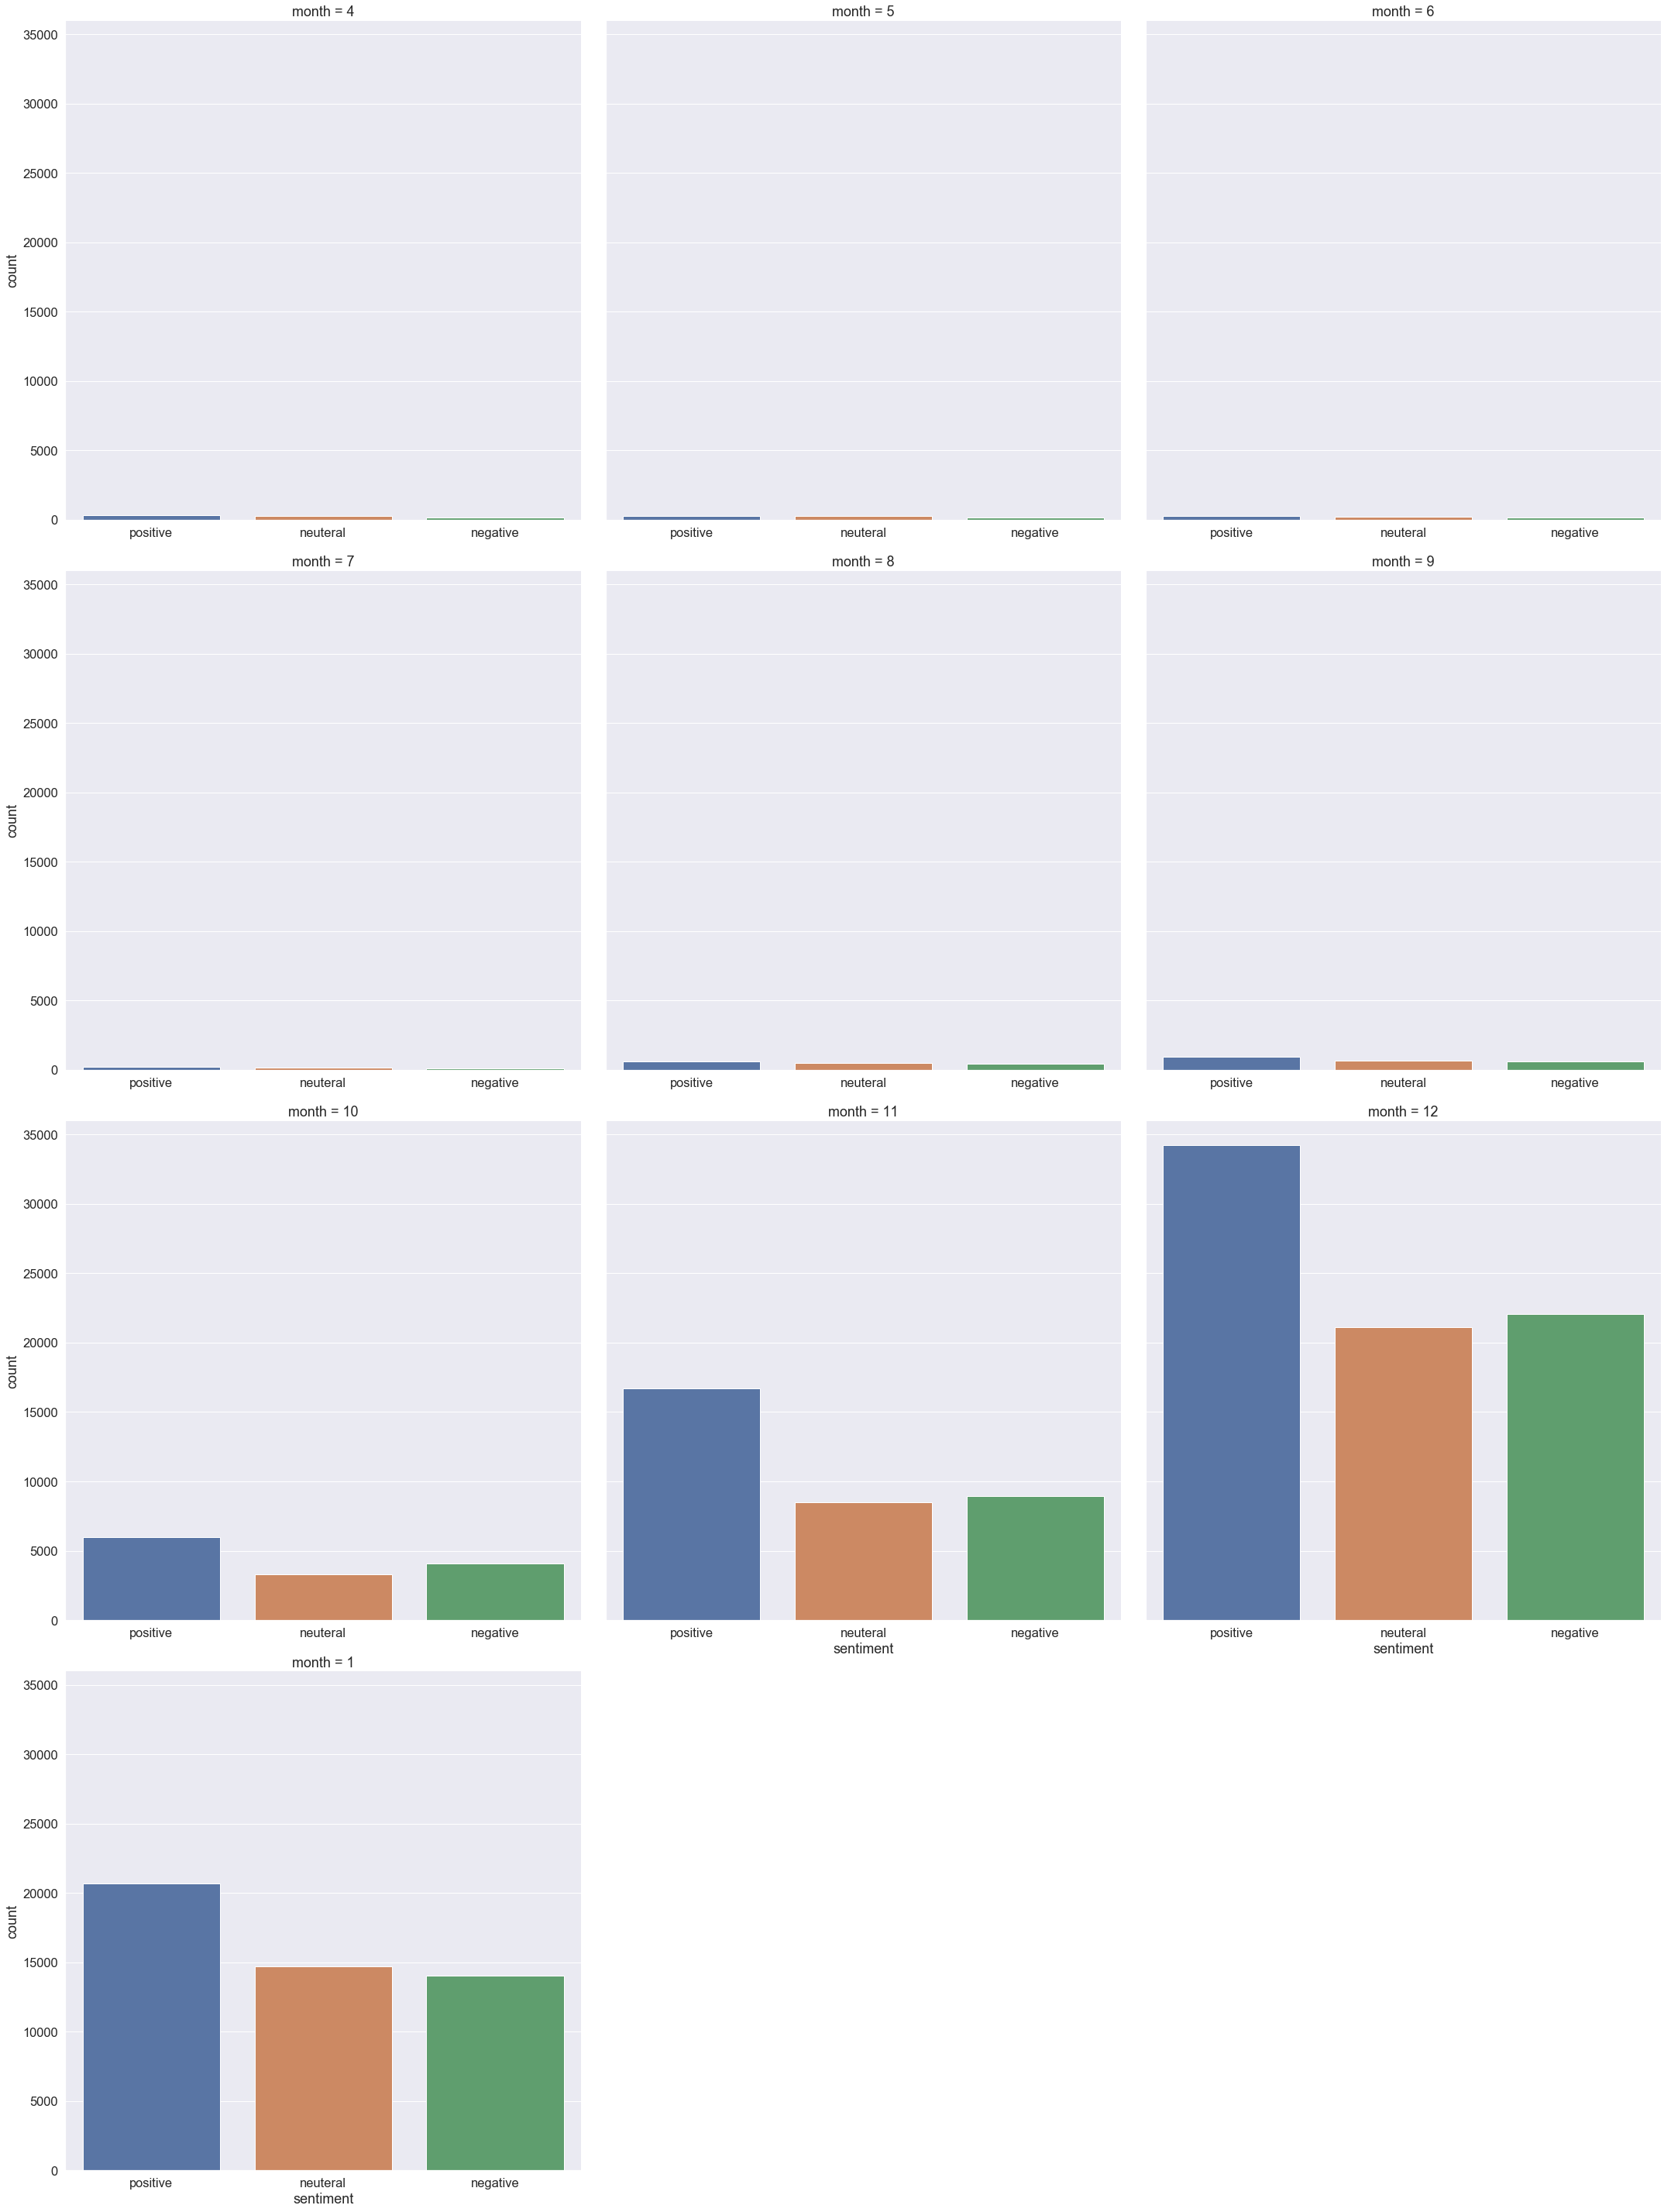

In [73]:
#subgraphs for sentiment for each month
sns.set(font_scale=1.5)
sns.catplot(data=df_total, x='sentiment', col='month', col_wrap=3, sharex=False, height=10, kind='count', col_order=[4,5,6,7,8,9,10,11,12,1])
plt.savefig('plots//sentiment by month.png')

<h2>Hashtags</h2>

<h2>Top Words</h2>

In [105]:
from collections import Counter
common_100 = Counter(" ".join(df_total["text_lemma1"]).split()).most_common(100)
df_common_100 = pd.DataFrame(common_100, columns=['word','occurrence'])

In [106]:
df_common_100.head(10)

,word,occurrence
0,vaccine,199883
1,covid,47052
2,people,18076
3,not,17974
4,get,17448
5,say,13963
6,pfizer,12080
7,dose,10966
8,need,10731
9,amp,9569


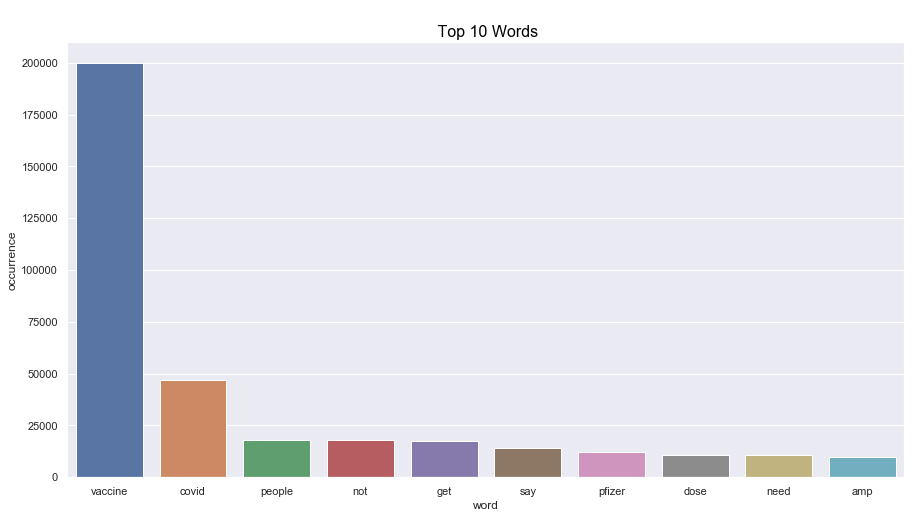

In [115]:
# bar plot
plt.figure(figsize=(15,8))
sns.barplot(x="word", y="occurrence", data=df_common_100.head(10))
plt.title('\n Top 10 Words', fontsize=16, color='Black')
plt.savefig('plots//Top 10 words.png')

<h2>Top 10 Bigrams</h2>

In [128]:
def seq_ngrams(xs, n):
    return [xs[i:i+n] for i in range(len(xs)-n+1)]

In [126]:
# Top Biagrams
def shingle(text, w):
    tokens = " ".join(text).split()
    return [' '.join(xs) for xs in seq_ngrams(tokens, w)]

In [129]:
words = shingle(df_total['text_lemma1'],2)

In [138]:
bigrams= pd.DataFrame(words)
bigrams_top10= pd.DataFrame(Counter(bigrams[0]).most_common(10), columns=['bigram','occurrence'])

In [139]:
bigrams_top10

,bigram,occurrence
0,covid vaccine,34722
1,coronavirus vaccine,5680
2,get vaccine,5493
3,pfizer vaccine,4065
4,vaccine rollout,2447
5,vaccine vaccine,2305
6,vaccine dose,2269
7,flu vaccine,2243
8,vaccine distribution,2217
9,take vaccine,2130


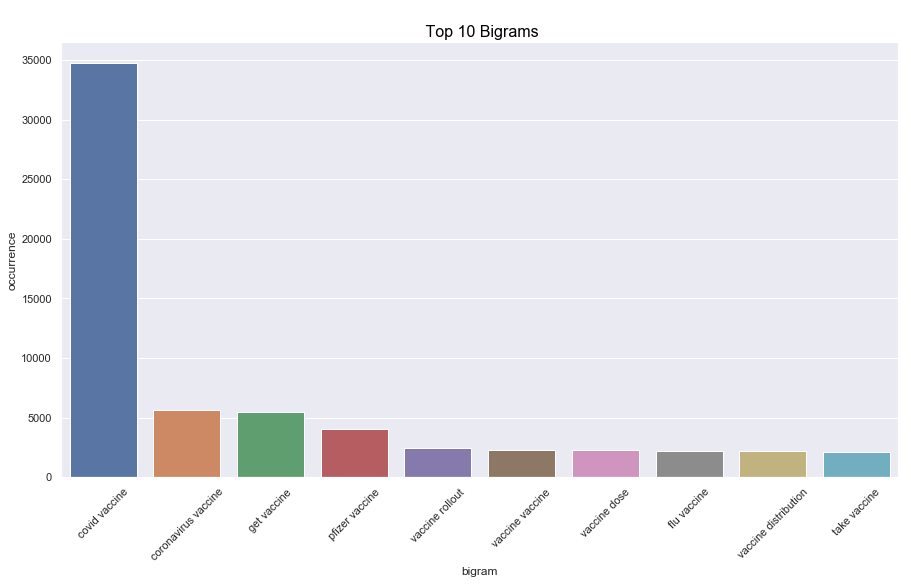

In [143]:
# bar plot
plt.figure(figsize=(15,8))
g= sns.barplot(x="bigram", y="occurrence", data=bigrams_top10.head(10))
for item in g.get_xticklabels():
    item.set_rotation(45)
plt.title('\n Top 10 Bigrams', fontsize=16, color='Black')
plt.savefig('plots//Top 10 Bigrams.png')